**🧑‍🌾 POBLACIÓN RURAL (% DEL TOTAL)**
****
**📊 Código del indicador WB: SP.RUR.TOTL.ZS**

🔎 Enfoque de análisis:
El porcentaje de población rural sobre el total de la población permite entender la estructura territorial y social de un país o región.
Este indicador refleja cuántas personas viven en zonas rurales en comparación con áreas urbanas.

En el contexto de Sudamérica, ayuda a identificar regiones con mayor dependencia de actividades primarias como la agricultura, menor acceso a servicios públicos y tecnológicos, y mayores desafíos en conectividad, salud y educación.

El análisis de la población rural es clave para el desarrollo sostenible, ya que muchas políticas de infraestructura, salud, transporte y educación deben adaptarse según la distribución rural/urbana de la población.

📍 Región de análisis: Sudamérica
🌿 Relación clave:
Alta población rural → mayor dispersión territorial → posibles limitaciones en acceso a servicios esenciales.

**CODIGOS PARA OBTENER LA BASE DE DATOS DE LA POBLACION RURAL DE SUDAMERICA**
****


In [ ]:
import requests
import pandas as pd

# Configurar pandas para mostrar todas las filas sin truncar
pd.set_option("display.max_rows", None)

# --------------------------
# 1. Definir la URL base y parámetros para la consulta a la API del Banco Mundial
# --------------------------
url_base = "https://api.worldbank.org/v2/country/all/indicator/SP.RUR.TOTL.ZS"
params = {
    "format": "json",
    "per_page": 1000,
    "page": 1
}

# Lista vacía para almacenar todos los datos recolectados de la API
todos_los_datos = []

# 2. Realizar una primera consulta para saber cuántas páginas existen
respuesta = requests.get(url_base, params=params)
data = respuesta.json()
paginas_totales = data[0]['pages']  # Número total de páginas que contiene la respuesta

# 3. Recorrer todas las páginas de la API y extraer los registros válidos
for pagina in range(1, paginas_totales + 1):
    params["page"] = pagina  # Actualizar el número de página en cada iteración
    respuesta = requests.get(url_base, params=params)
    data = respuesta.json()
    registros = data[1]  # Lista de registros con los datos reales

    for r in registros:
        if r["value"] is not None:
            todos_los_datos.append({
                "País": r["country"]["value"],
                "Año": int(r["date"]),
                "Población rural (%)": float(r["value"])
            })

# 4. Crear un DataFrame con todos los datos recolectados
df = pd.DataFrame(todos_los_datos)

# 5. Definir los países sudamericanos
paises_sudamericanos = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
    "Paraguay", "Peru", "Uruguay", "Venezuela, RB"
]

# 6. Filtrar por países sudamericanos y años entre 2018 y 2024
df_filtrado = df[
    (df["País"].isin(paises_sudamericanos)) &
    (df["Año"].between(2018, 2024))
]

# 7. Ordenar los datos por país y año
df_filtrado = df_filtrado.sort_values(by=["País", "Año"], ascending=[True, True])

# Mostrar el resultado
print(df_filtrado)


In [5]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel("poblacion_rural_sudamerica_2018_2024.xlsx")

# Mostrarlo como tabla
df

Saving poblacion_rural_sudamerica_2018_2024.xlsx to poblacion_rural_sudamerica_2018_2024 (3).xlsx


,País,Año,Población rural (%)
0,Argentina,2018,8.130
1,Argentina,2019,8.009
2,Argentina,2020,7.889
3,Argentina,2021,7.771
4,Argentina,2022,7.653
5,Argentina,2023,7.537
6,Argentina,2024,7.421
7,Bolivia,2018,30.575
8,Bolivia,2019,30.227
9,Bolivia,2020,29.877


**BASE DE DATOS**
****

In [ ]:
df_filtrado.to_excel("poblacion_rural_sudamerica_2018_2024.xlsx", index=False)


**LINEA DE TIEMPO DE LA POBLACION RURAL SUDAMERICANA**
****

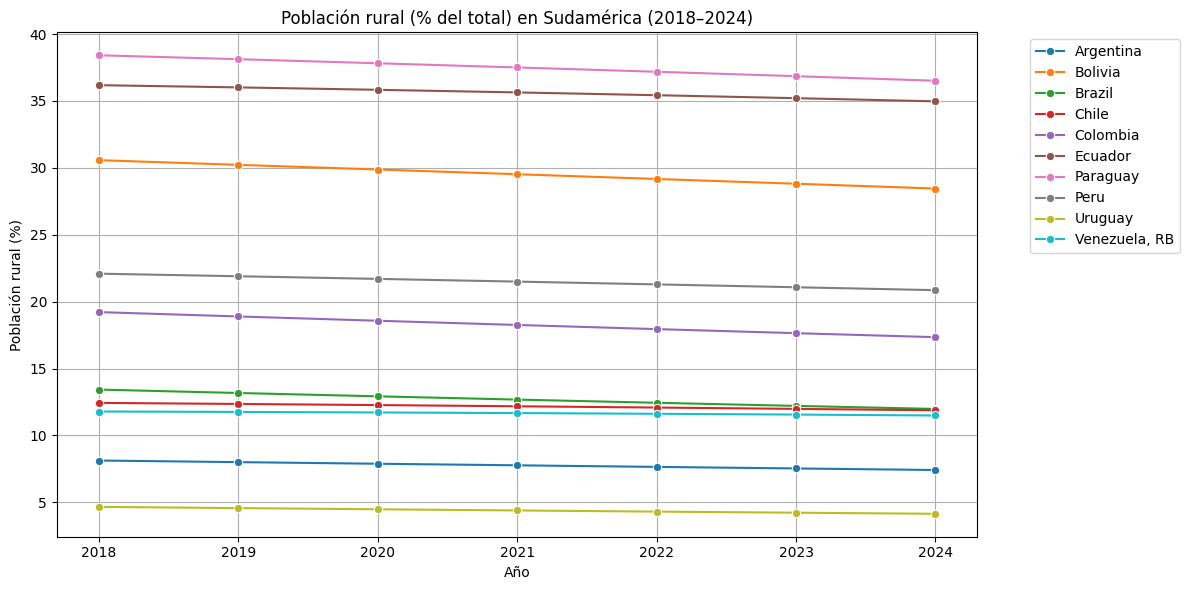

In [6]:
# 1. Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Leer el archivo Excel
df_rural = pd.read_excel("poblacion_rural_sudamerica_2018_2024.xlsx")

# 3. Crear figura y tamaño del gráfico
plt.figure(figsize=(12, 6))

# 4. Crear gráfico de líneas con seaborn
sns.lineplot(
    data=df_rural,
    x="Año",
    y="Población rural (%)",   # Esta debe coincidir exactamente con el nombre de la columna en tu Excel
    hue="País",
    marker="o"
)

# 5. Personalizar gráfico
plt.title("Población rural (% del total) en Sudamérica (2018–2024)")
plt.xlabel("Año")
plt.ylabel("Población rural (%)")
plt.grid(True)

# 6. Ajustar leyenda y diseño
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()

# 7. Mostrar gráfico
plt.show()


**LINEA DE TIEMPO DE LA POBLACION RURAL SUDAMERICANA INTERACTIVA**
****

In [7]:
# 1. Importar librerías necesarias
import pandas as pd
import plotly.express as px

# 2. Leer tu archivo Excel
df_rural = pd.read_excel("poblacion_rural_sudamerica_2018_2024.xlsx")

# 3. Crear gráfico interactivo con Plotly
fig = px.line(
    df_rural,
    x="Año",
    y="Población rural (%)",   # Asegúrate que la columna tenga ese nombre exacto
    color="País",
    markers=True,
    title="Población rural (% del total) en Sudamérica (2018–2024)"
)

# 4. Personalizar diseño del gráfico
fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Población rural (%)",
    hovermode="closest"  # Muestra solo la info más cercana al cursor
)

# 5. Mostrar el gráfico en pantalla
fig.show()


**LINEA DE TIEMPO DE LA POBLACION RURAL SUDAMERICANA INTERACTIVA ANIMADA**
****

In [8]:
# 1. Importar la biblioteca necesaria
import pandas as pd
import plotly.express as px

# 2. Leer el archivo Excel con la base de datos
df_rural = pd.read_excel("poblacion_rural_sudamerica_2018_2024.xlsx")

# 3. Crear gráfico de barras horizontal animado por año
fig = px.bar(
    df_rural,
    x="Población rural (%)",    # Eje X: porcentaje de población rural
    y="País",                   # Eje Y: nombre del país
    animation_frame="Año",      # Animación por año (frame)
    orientation="h",            # Barras horizontales
    color="País",               # Colores distintos por país
    range_x=[0, 100],           # Rango fijo en eje X (porcentaje de 0 a 100)
    title="Población rural en Sudamérica (Animación 2018–2024)"
)

# 4. Etiquetas de ejes personalizadas
fig.update_layout(
    xaxis_title="Población rural (% del total)",
    yaxis_title="País"
)

# 5. Mostrar el gráfico interactivo y animado
fig.show()


**ANALISIS DESCRIPTIVO DE LA POBLACION RURAL SUDAMERICANA**
****
Analisamos el indicador "Poblacion Rural" para hallar el promedio de cada pais entre los años de 2018 a 2024.

In [9]:
# 1. Importar pandas si no lo has hecho aún
import pandas as pd

# 2. Leer tu archivo Excel
df_rural = pd.read_excel("poblacion_rural_sudamerica_2018_2024.xlsx")

# 3. Agrupar los datos por país y calcular el promedio de población rural
promedios = df_rural.groupby("País")["Población rural (%)"].mean().reset_index()

# 4. Ordenar los países de mayor a menor población rural promedio
promedios = promedios.sort_values(by="Población rural (%)", ascending=False)

# 5. Mostrar el DataFrame resultante
print(promedios)


            País  Población rural (%)
6       Paraguay            37.485857
5        Ecuador            35.610714
1        Bolivia            29.520429
7           Peru            21.489714
4       Colombia            18.271000
2         Brazil            12.694000
3          Chile            12.172714
9  Venezuela, RB            11.661000
0      Argentina             7.772857
8        Uruguay             4.401571


**CONCLUCIONES**
****
1. Desigual distribución entre países
"Se observa una gran variación en el porcentaje de población rural entre los países sudamericanos. Mientras Bolivia y Paraguay mantienen una alta proporción de habitantes en zonas rurales, países como Chile y Uruguay presentan un claro predominio urbano."

2. Desarrollo urbano-rural
"Los países con menor población rural suelen tener economías más urbanizadas, con mayor concentración de servicios, industria y tecnología en las ciudades."

3. Implicancias para políticas públicas
"Países con alta población rural, como Bolivia, podrían necesitar más inversión en infraestructura rural, educación descentralizada y acceso a servicios básicos fuera de los centros urbanos."

4. Transición demográfica y migración interna
"El promedio bajo en algunos países puede estar relacionado con procesos de migración del campo a la ciudad, motivados por búsqueda de empleo, educación o mejores servicios."

5. Comparación regional
"Esta comparación también permite entender qué países mantienen aún estructuras productivas tradicionales basadas en agricultura familiar o economías rurales, lo que puede influir en sus estrategias de desarrollo sostenible."